In [1]:
import pandas as pd
from source.jabba import fastQABBA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

def sigificant_digit(number, digits=2):
    return round(number, digits - int(math.floor(math.log10(abs(number)))) - 1)

0 QABBA (VQ, scl=1): AceDfCBdabEaGF 140 14 13 0.12
0 QABBA (GA, scl=1): ABCeDfGFEbdDca 140 14 13 0.058
0 QABBA (VQ, scl=5): AcFGDaECedbBfg 140 14 14 0.058
0 QABBA (GA, scl=5): baBcCGgfEeFdDA 140 14 14 0.058


1 QABBA (VQ, scl=1): AbdCDBEacECbeFfA 140 16 12 0.32
1 QABBA (GA, scl=1): AbeEFfdDadcbBCcA 140 16 12 0.073
1 QABBA (VQ, scl=5): AHFECagdDbcBfeGA 140 16 15 0.069
1 QABBA (GA, scl=5): ACEdgHGeFfcDbaBA 140 16 15 0.12


2 QABBA (VQ, scl=1): ADCadcBeEbdC 140 12 10 0.29
2 QABBA (GA, scl=1): AabdcEeCBDcb 140 12 10 0.12
2 QABBA (VQ, scl=5): AEcdbBaeCDbc 140 12 10 0.069
2 QABBA (GA, scl=5): aBAbCEecDdCA 140 12 10 0.12




<Figure size 640x480 with 0 Axes>

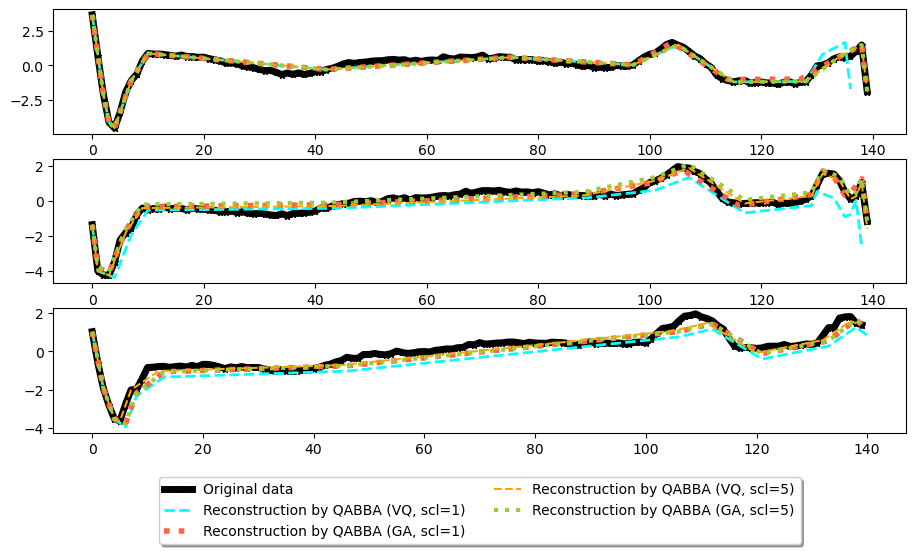

In [2]:
df = pd.read_csv('UCR2018/ECG5000/ECG5000_TEST.tsv', sep='\t', header=None)
plt.figure()
fig, axs = plt.subplots(3, figsize=(11, 5.5))
TOL = 0.1
SCL1 = 1
SCL2 = 5
ALPHA = 0.4

for i in range(3):
    ts = df.iloc[i].values[1:]

    qabba1 = fastQABBA(init='agg', tol=TOL, sorting='2-norm', scl=SCL1, alpha=ALPHA, verbose=0, 
                       bits_for_len=8, bits_for_inc=16)
    symbols1 = qabba1.transform(ts)
    inv_ts1 = qabba1.inverse_transform(symbols1, ts[0])
    
    qabba2 = fastQABBA(init='kmeans', tol=TOL, scl=SCL1, k=len(set(symbols1)), verbose=0, 
                       bits_for_len=8, bits_for_inc=16)
    symbols2 = qabba2.transform(ts)
    inv_ts2 = qabba2.inverse_transform(symbols2, ts[0])
    
    qabba3 = fastQABBA(init='agg', tol=TOL, sorting='2-norm', scl=SCL2, alpha=ALPHA, verbose=0, 
                       bits_for_len=8, bits_for_inc=16)
    symbols3 = qabba3.transform(ts)
    inv_ts3 = qabba3.inverse_transform(symbols3, ts[0])
    
    qabba4 = fastQABBA(init='kmeans', tol=TOL, scl=SCL2, k=len(set(symbols3)), verbose=0, 
                       bits_for_len=8, bits_for_inc=16)
    symbols4 = qabba4.transform(ts)
    inv_ts4 = qabba4.inverse_transform(symbols4, ts[0])
    
    min_len = min(len(ts), len(inv_ts1), len(inv_ts2), len(inv_ts3), len(inv_ts4))
    
    print(i, 'QABBA (VQ, scl=1):', ''.join(symbols2), ts.shape[0],
                                  len(symbols2), len(set(symbols2)), 
          sigificant_digit(mean_squared_error(ts[:min_len], inv_ts1[:min_len])))
    
    print(i, 'QABBA (GA, scl=1):', ''.join(symbols1), ts.shape[0], 
                                  len(symbols1), len(set(symbols1)), 
          sigificant_digit(mean_squared_error(ts[:min_len], inv_ts2[:min_len])))
    
    print(i, 'QABBA (VQ, scl=5):', ''.join(symbols4), ts.shape[0], 
                                  len(symbols4), len(set(symbols4)),
          sigificant_digit(mean_squared_error(ts[:min_len], inv_ts3[:min_len])))
    
    print(i, 'QABBA (GA, scl=5):', ''.join(symbols3), ts.shape[0], 
                                  len(symbols3), len(set(symbols3)), 
          sigificant_digit(mean_squared_error(ts[:min_len], inv_ts4[:min_len])))
    
    print()
    
    axs[i].plot(ts, label='Original data', markersize=5, marker='*', c='black', linewidth=5)
    axs[i].plot(inv_ts1, label='Reconstruction by QABBA (VQ, scl=1)', c='cyan', linestyle='--', linewidth=2)
    axs[i].plot(inv_ts2, label='Reconstruction by QABBA (GA, scl=1)', c='tomato', linestyle=':', linewidth=4)
    
    axs[i].plot(inv_ts3, label='Reconstruction by QABBA (VQ, scl=5)', c='orange', linestyle='--')
    axs[i].plot(inv_ts4, label='Reconstruction by QABBA (GA, scl=5)', c='yellowgreen', linestyle=':', linewidth=3)
    print()
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.3),
          ncol=2, fancybox=True, shadow=True)

plt.savefig('figs/recontruction.pdf', bbox_inches='tight') 
plt.show()